# Setting & Import

In [6]:
import time
import sys
import os

# 현재 파일(main.ipynb)이 있는 디렉토리의 부모 디렉토리를 sys.path에 추가
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [7]:
# INFO 
from gameInfo import *
from fileInfo import *
from hyperParams import *
from setDevice import *
from timer import *

# CODES
from state.ver2 import *
from network.resnet import *
from trainer.ver1 import *
from eval.ver1 import *
from selfplay.ver1 import *
from tester.ver2 import *
from utils.saveLoad import *

## Check

In [8]:
print(f"Using device: {device}")

Using device: mps


## Setting

In [9]:
State = select_state(STATE_DIM)

## Train

'/Users/ijimin/Documents/GitHub/AiGO/Omok/Jimin/model/Omok_1' already exists.

Train 1 --------------------------------
self play 2 / 20
self play 4 / 20
self play 6 / 20
self play 8 / 20
self play 10 / 20
self play 12 / 20
self play 14 / 20
self play 16 / 20
self play 18 / 20
self play 20 / 20
> Train Started.
latest_model_weight saved successfully!
--> 1번째 epoch 학습에 걸린 시간은, 0시간 20분 57초 입니다. 


Train 2 --------------------------------
self play 2 / 20
self play 4 / 20
self play 6 / 20
self play 8 / 20
self play 10 / 20
self play 12 / 20
self play 14 / 20
self play 16 / 20
self play 18 / 20
self play 20 / 20
> Train Started.
latest_model_weight saved successfully!
--> 2번째 epoch 학습에 걸린 시간은, 0시간 25분 26초 입니다. 


Train 3 --------------------------------
self play 2 / 20
self play 4 / 20
self play 6 / 20
self play 8 / 20
self play 10 / 20
self play 12 / 20
self play 14 / 20
self play 16 / 20
self play 18 / 20
self play 20 / 20
> Train Started.
latest_model_weight saved successfully!
--> 3번째

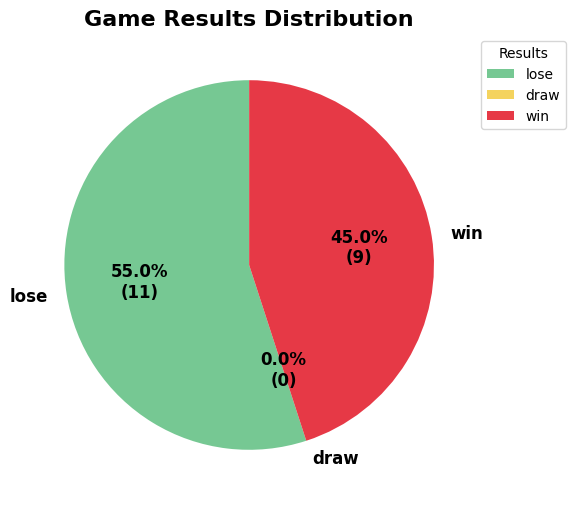

--> 5번째 epoch 학습에 걸린 시간은, 0시간 41분 11초 입니다. 


Train 6 --------------------------------
self play 2 / 20
self play 4 / 20
self play 6 / 20
self play 8 / 20
self play 10 / 20
self play 12 / 20
self play 14 / 20
self play 16 / 20
self play 18 / 20
self play 20 / 20
> Train Started.
latest_model_weight saved successfully!
--> 6번째 epoch 학습에 걸린 시간은, 0시간 19분 3초 입니다. 


Train 7 --------------------------------
self play 2 / 20
self play 4 / 20
self play 6 / 20
self play 8 / 20
self play 10 / 20
self play 12 / 20
self play 14 / 20
self play 16 / 20
self play 18 / 20
self play 20 / 20
> Train Started.
latest_model_weight saved successfully!
--> 7번째 epoch 학습에 걸린 시간은, 0시간 18분 46초 입니다. 


Train 8 --------------------------------
self play 2 / 20
self play 4 / 20
self play 6 / 20
self play 8 / 20
self play 10 / 20
self play 12 / 20
self play 14 / 20
self play 16 / 20
self play 18 / 20
self play 20 / 20
> Train Started.
latest_model_weight saved successfully!
--> 8번째 epoch 학습에 걸린 시간은, 0시간 16분 3초 입니다.

KeyboardInterrupt: 

In [10]:
start = time.time()
previous_time = start

# 시각화용 
win_rates = []

# model 정의
model = Network(N_RESIDUAL_BLOCK, N_KERNEL, STATE_DIM, N_ACTIONS)
model = model.to(device)

self_play = SelfPlay(model, TRAIN_TEMPERATURE, TEMP_DISCOUNT, TRAIN_N_SELFPLAY, N_PLAYOUT)
train = TrainNetwork(model, BATCH_SIZE, LEARNING_RATE, LEARN_DECAY, LEARN_EPOCH)
eval_network = EvalNetwork(model, EVAL_GAME_COUNT, EVAL_TEMPERATURE, N_PLAYOUT)

# 경로 생성
make_directory(F_PATH)

# 학습
for i in range(EPOCHS):
    print(f'\nTrain {i+1} --------------------------------')

    self_play(i)
    train(self_play.history)
    save_model(train.model, f_name='latest_model_weight')

    if (i+1) % 5 == 0:    
        eval_network(train.model)
        win_rates.append(eval_network.win_rate)

    if (i+1) % 10 == 0:
        eval_network.visualize_game(download=True, idx=i+1)
        print(f"current temp is {self_play.temp}")

    if eval_network.updated:
        self_play.update_model(train.model)
        eval_network.updated = False

    h, m, s = convert_seconds(time.time() - previous_time)
    previous_time = time.time() 
    print(f"--> {i+1}번째 epoch 학습에 걸린 시간은, {h}시간 {m}분 {s}초 입니다. \n")

h, m, s = convert_seconds(time.time() - start)
print(f"학습에 걸린 시간은, {h}시간 {m}분 {s}초 입니다. ")

In [ ]:
# download hyper params 
save_as_txt('hyperParams', hyper_params)

In [ ]:
visualize_win_rate(win_rates, path=F_PATH, download=True)
visualize_loss(train.losses, path=F_PATH, download=True)